# Impact of Climate Change on Agriculture: A Machine Learning Approach

## Introduction

This notebook aims to explore the impact of climate change on agriculture and predict the economic outcomes of different environmental and agricultural variables using machine learning. We'll use a dataset that includes climate-related features such as temperature, CO2 emissions, precipitation, and others.

### Objective:

The primary goal is to build a predictive model that estimates the economic impact of climate change on agriculture using Random Forest regression.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = 'climate_change_impact_on_agriculture_2024.csv'
data = pd.read_csv(file_path)

data.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the number of missing values per column
missing_values

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64

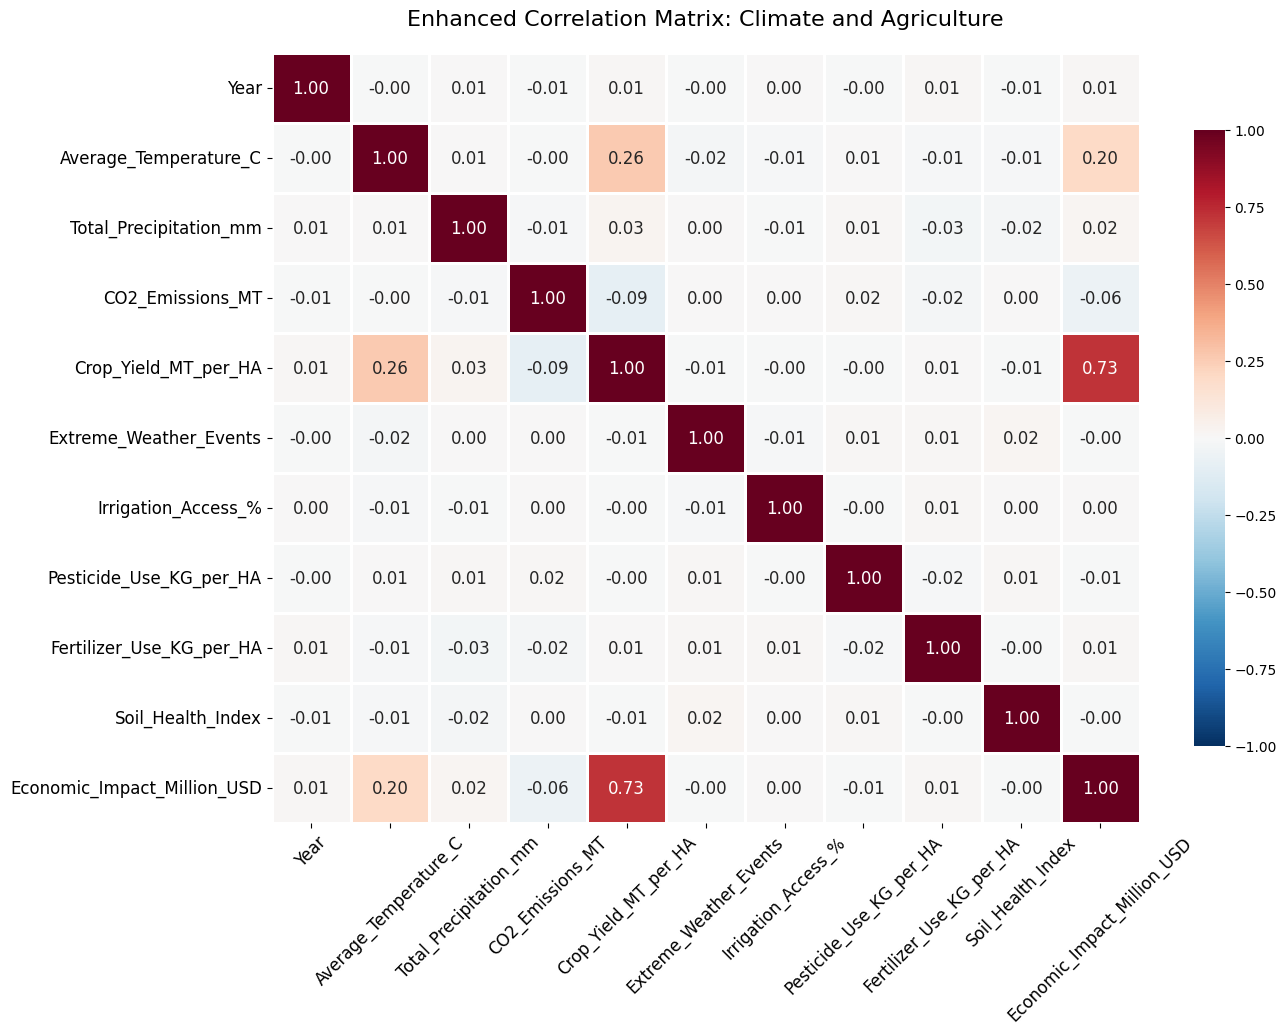

In [8]:
# Selecting only the numerical columns from the dataset
numerical_columns = data.select_dtypes(include=["float64", "int64"])

# Calculating the correlation matrix for numeric columns
correlation_matrix_numeric = numerical_columns.corr()

# Plotting the heatmap with the correlation matrix
plt.figure(figsize=(14, 10))

sns.heatmap(correlation_matrix_numeric, annot=True, cmap="RdBu_r", vmin=-1, vmax=1, center=0, 
            linewidths=1, linecolor='white', annot_kws={"size":12}, fmt=".2f", cbar_kws={'shrink': .8})

plt.title("Enhanced Correlation Matrix: Climate and Agriculture", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.show()


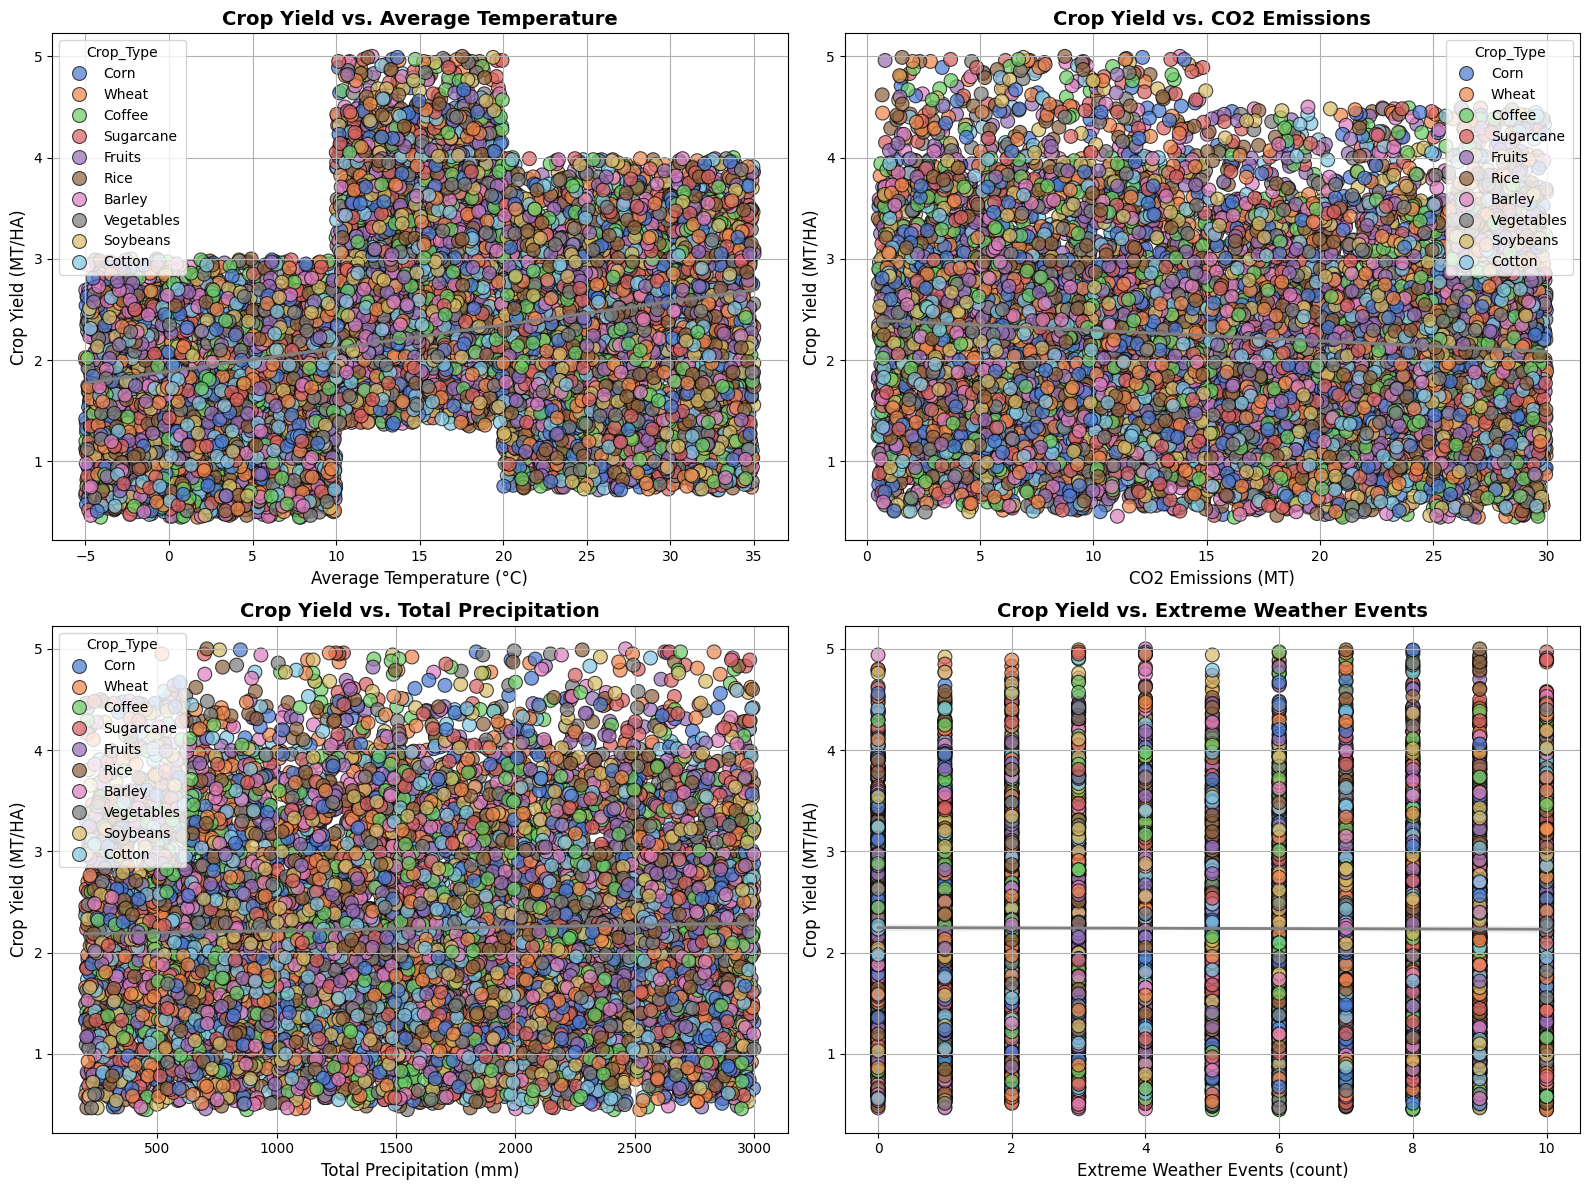

In [18]:
# Creating scatter plots 
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

palette = "muted"

# Plotting Crop Yield vs. Average Temperature with regression lines by crop type
sns.scatterplot(x=data['Average_Temperature_C'], y=data['Crop_Yield_MT_per_HA'], hue=data['Crop_Type'], 
                ax=axes[0, 0], palette=palette, s=100, alpha=0.7, edgecolor="black")
sns.regplot(x=data['Average_Temperature_C'], y=data['Crop_Yield_MT_per_HA'], scatter=False, ax=axes[0, 0], color='gray', line_kws={'linewidth':2})
axes[0, 0].set_title('Crop Yield vs. Average Temperature', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Average Temperature (°C)', fontsize=12)
axes[0, 0].set_ylabel('Crop Yield (MT/HA)', fontsize=12)
axes[0, 0].grid(True)

# Plotting Crop Yield vs. CO2 Emissions with regression lines by crop type
sns.scatterplot(x=data['CO2_Emissions_MT'], y=data['Crop_Yield_MT_per_HA'], hue=data['Crop_Type'], 
                ax=axes[0, 1], palette=palette, s=100, alpha=0.7, edgecolor="black")
sns.regplot(x=data['CO2_Emissions_MT'], y=data['Crop_Yield_MT_per_HA'], scatter=False, ax=axes[0, 1], color='gray', line_kws={'linewidth':2})
axes[0, 1].set_title('Crop Yield vs. CO2 Emissions', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('CO2 Emissions (MT)', fontsize=12)
axes[0, 1].set_ylabel('Crop Yield (MT/HA)', fontsize=12)
axes[0, 1].grid(True)

# Plotting Crop Yield vs. Precipitation with regression lines by crop type
sns.scatterplot(x=data['Total_Precipitation_mm'], y=data['Crop_Yield_MT_per_HA'], hue=data['Crop_Type'], 
                ax=axes[1, 0], palette=palette, s=100, alpha=0.7, edgecolor="black")
sns.regplot(x=data['Total_Precipitation_mm'], y=data['Crop_Yield_MT_per_HA'], scatter=False, ax=axes[1, 0], color='gray', line_kws={'linewidth':2})
axes[1, 0].set_title('Crop Yield vs. Total Precipitation', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Total Precipitation (mm)', fontsize=12)
axes[1, 0].set_ylabel('Crop Yield (MT/HA)', fontsize=12)
axes[1, 0].grid(True)

# Plotting Crop Yield vs. Extreme Weather Events
sns.scatterplot(x=data['Extreme_Weather_Events'], y=data['Crop_Yield_MT_per_HA'], hue=data['Crop_Type'], 
                ax=axes[1, 1], palette=palette, s=100, alpha=0.7, edgecolor="black", legend=False)
sns.regplot(x=data['Extreme_Weather_Events'], y=data['Crop_Yield_MT_per_HA'], scatter=False, ax=axes[1, 1], color='gray', line_kws={'linewidth':2})
axes[1, 1].set_title('Crop Yield vs. Extreme Weather Events', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Extreme Weather Events (count)', fontsize=12)
axes[1, 1].set_ylabel('Crop Yield (MT/HA)', fontsize=12)
axes[1, 1].grid(True)

plt.tight_layout()

plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error

categorical_columns = data[["Country", "Region", "Crop_Type", "Adaptation_Strategies"]]

# Selecting the features 
X = data.drop(columns=["Economic_Impact_Million_USD", "Country", "Region", "Adaptation_Strategies", "Crop_Type"])
y = data["Economic_Impact_Million_USD"]

# Redefining and scaling the numerical columns
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=["float64", "int64"])
scaled_numerical = scaler.fit_transform(numerical_columns)

# One-hot encoding categorical columns (Country, Region, Crop_Type, Adaptation_Strategies)
encoder = OneHotEncoder(drop="first")

# Converting the sparse matrix output of OneHotEncoder to a dense array
encoded_categorical = encoder.fit_transform(categorical_columns).toarray()

# Combine scaled numerical and encoded categorical data
X_preprocessed = pd.concat([pd.DataFrame(scaled_numerical), pd.DataFrame(encoded_categorical)], axis=1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error 
mae = mean_absolute_error(y_test, y_pred)
mae

np.float64(227.51152284999998)

                    Feature  Importance
4      Crop_Yield_MT_per_HA    0.763846
2    Total_Precipitation_mm    0.026961
6       Irrigation_Access_%    0.026396
7   Pesticide_Use_KG_per_HA    0.023216
3          CO2_Emissions_MT    0.022427
..                      ...         ...
44        Region_South West    0.000271
48             Region_Volga    0.000257
50       Region_West Bengal    0.000249
45         Region_Southeast    0.000207
31      Region_Northwestern    0.000183

[65 rows x 2 columns]


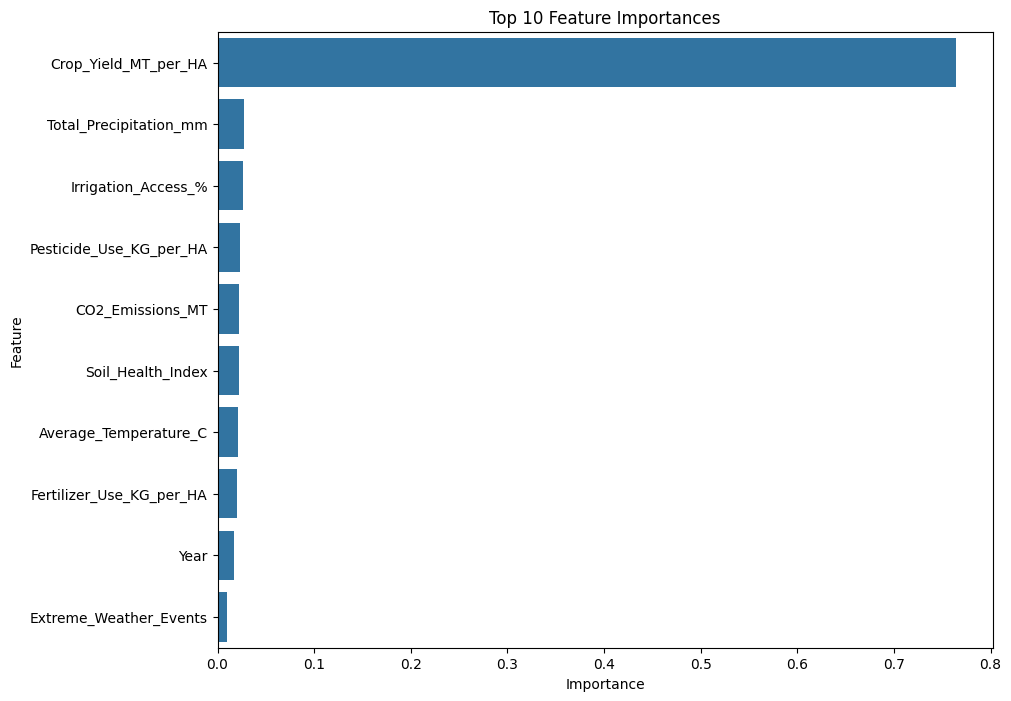

In [18]:
# Get feature importance from the trained RandomForestRegressor model
feature_importance = best_rf.feature_importances_

# Combine the feature names from both numerical and categorical data
numerical_features = X.columns
categorical_features = encoder.get_feature_names_out(categorical_columns.columns)
all_feature_names = np.concatenate([numerical_features, categorical_features])

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

# Plot the top important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()


In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Setting up the randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}


In [13]:
# Creating a new RandomForestRegressor model with the best parameters
best_rf = RandomForestRegressor(
    n_estimators=400,
    min_samples_split=10,
    min_samples_leaf=2,
    max_depth=10,
    bootstrap=True,
    random_state=42
)

# Train the model with the best parameters
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_rf.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
best_mae = mean_absolute_error(y_test, y_pred_best)
print(f"Mean Absolute Error with tuned model: {best_mae}")

Mean Absolute Error with tuned model: 225.17308055882145


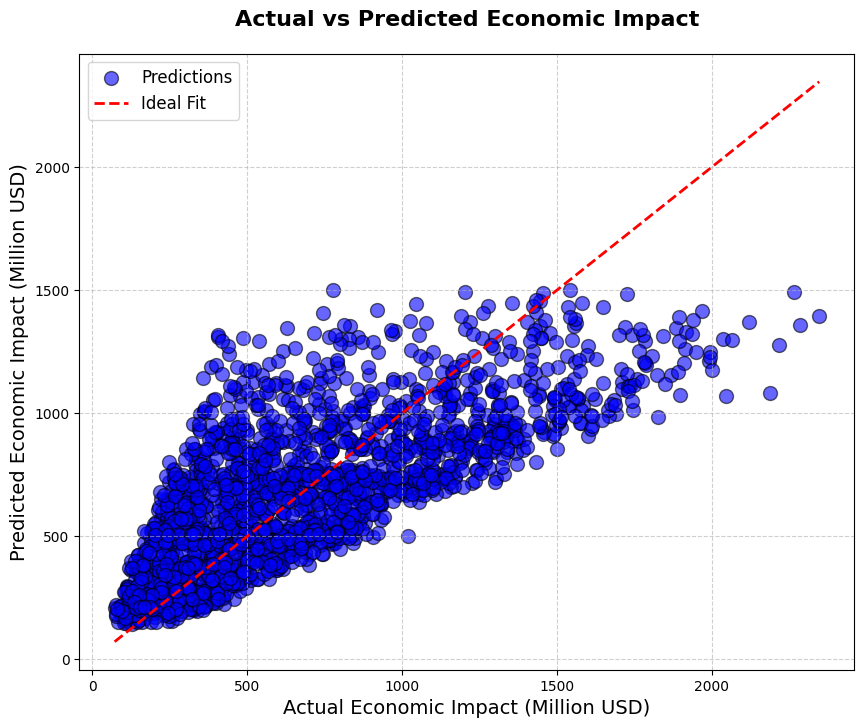

In [15]:
# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_best, color='blue', alpha=0.6, s=100, edgecolor='black', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Ideal Fit')
plt.title('Actual vs Predicted Economic Impact', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Actual Economic Impact (Million USD)', fontsize=14)
plt.ylabel('Predicted Economic Impact (Million USD)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.show()


## Conclusion

In this project, I set out to explore how climate change impacts agriculture, with a focus on predicting the economic outcomes using machine learning. By analyzing various environmental and agricultural factors, I was able to gain valuable insights into what drives economic shifts in this critical industry.loration.

### Key Takeaways:

1. ##### What Really Matters:

    - The model revealed that Crop Yield per Hectare, Irrigation Access, and Total Precipitation are the most important factors affecting economic outcomes in agriculture. This makes sense—productivity and water availability are essential, and under the pressures of climate change, they become even more crucial.

    - Surprisingly, CO2 Emissions had less direct influence on economic predictions than I initially expected. This suggests that while emissions are important on a global scale, other local environmental factors have a greater immediate effect on agricultural economics.
    

2. ##### Model Performance:

    - My initial Random Forest model achieved a Mean Absolute Error (MAE) of around 227.51 million USD. This was a decent result, but it showed room for improvement. After tuning the model's hyperparameters, I saw slight performance gains, though the improvement was marginal.

    - This highlights the importance of hyperparameter tuning, adjusting things like tree depth and the number of trees—but it also indicates that more advanced models could potentially yield better results.


3. ##### What I Learned from Tuning:

    - By using RandomizedSearchCV to test different parameter combinations, I found that having more trees and controlling their depth struck a good balance between accuracy and avoiding overfitting.

    - However, even after tuning, I believe there's more potential to explore with alternative machine learning algorithms.
    

### Challenges and Limitations:

- The dataset provided a solid foundation, but it doesn’t capture external factors like government policies, market dynamics, or technology advancements, all of which can have a significant impact on agriculture.

- I focused on economic impact, but climate change affects more than just financial outcomes. Food security, environmental sustainability, and long-term resilience could be valuable areas to explore in future work.

- Predicting the future of agriculture in the face of climate change is a complex task. While I captured important factors, the long-term unpredictability of climate effects might require more detailed, dynamic data.

### Final Thoughts:

Working on this project has been a rewarding learning experience. It gave me valuable insights into how machine learning can help us understand the complex relationship between climate change and agriculture, especially in highlighting the importance of factors like crop productivity and water management. While I’m pleased with the progress, I realize that there’s still much more to explore—better models to try, richer data to incorporate, and deeper questions to ask. What stands out to me most is that predicting the future of agriculture isn’t just about data—it’s about the people, communities, and ecosystems that rely on it. I’m eager to build on what I’ve learned here, dive deeper, and continue evolving this work with a broader perspective in the future.